# Another Step Size 
4/11/2016
This notebook will be used to again explore how to choose a step size.
The goal of this notebook is provide a clearer understanding of the 
effect of step size compared to the previous notebook.  In that effect,
this notebook will use a larger, realistic dataset and will use simpler
calculations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ml_helpers.regression as reg
import ml_helpers.graph as mlg
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./kc_house_data.csv')

We will explore the effect of square feet on price.  To better understand what
our data looks like, we will graph it below.

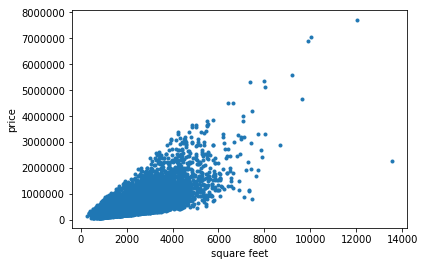

In [3]:
plt.plot(df.sqft_living, df.price, '.')
plt.xlabel('square feet')
plt.ylabel('price')
plt.show()

Split the data into a training set and a test set and generate feature matrix. 
For simplicity we will assume a simple linear relationship between the independant
and dependant variables.

In [4]:
train, test = train_test_split(df, test_size=0.2)

In [5]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 1)
train_output = train.price

Now we will define a single iteration of gradient descent

In [6]:
def gradient_descent_single_step(output, features, weights, step):
    n,m = np.shape(features)
    partial = reg.get_rss_partial(output, features, weights)
    return weights - step * partial, partial

# Plotting the learning curve for simple linear regression

Define a function that calculates how the magnitude of the partial derivative changes over a fixed set of steps.  The magnitude of the partial is an indicator of how close the current function is to convergence at the minimum.

In [7]:
def get_curve(output, features, weights, step, iterations):
    weights_temp = weights.copy()
    magnitude = []
    for x in xrange(iterations):
        weights_temp, partial = gradient_descent_single_step(output, features, weights_temp, step)
        magnitude.append(np.linalg.norm(partial))
    return magnitude

Plot the learning curves for a number of different step sizes.

In [13]:
iterations = 50
step_size = np.logspace(-11, -13, 10)
step_size

array([  1.00000000e-11,   5.99484250e-12,   3.59381366e-12,
         2.15443469e-12,   1.29154967e-12,   7.74263683e-13,
         4.64158883e-13,   2.78255940e-13,   1.66810054e-13,
         1.00000000e-13])

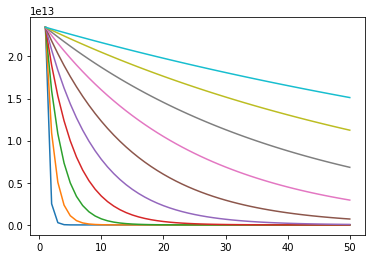

In [14]:
for step in step_size:
    learning_curve  = get_curve(train_output, train_feat, weights, step, iterations)
    plt.plot(np.arange(1, iterations+1, 1), learning_curve)
plt.show()

In [15]:
def plot_learning_curve(output, features, weights, step_size, iterations):
    for step in step_size:
        learning_curve  = get_curve(train_output, train_feat, weights, step, iterations)
        plt.plot(np.arange(1, iterations+1, 1), learning_curve)
    plt.title('Learning Curve')
    plt.show()

Train the regression line on the training data using the fastest converging step size.

In [16]:
model = weights.copy()
for x in xrange(10):
    model, partial = gradient_descent_single_step(train_output, train_feat, model, step_size[0])

Plot the model against the test data.

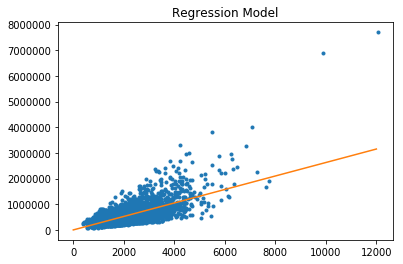

In [17]:
def eval_model(model, data, start=0, end=12000):
    plt.plot(data.sqft_living, data.price, '.')
    mlg.add_to_plot(model, np.arange(start, end, 1))
    plt.title('Regression Model')
    plt.show()
eval_model(model, test)

## Polynomial regression
We will not attempt the same exploration except using different polynomial models.

In [18]:
def plot_regression(output, features, weights, data, step_size, iterations, start=0, end=12000):
    plot_learning_curve(output,features, weights, step_size, iterations)
    model = weights.copy()
    for x in xrange(iterations):
        model, partial = gradient_descent_single_step(output, features, model, step_size[0])
    eval_model(model, data, start=start, end=end)
    return model

Degree 1 again...

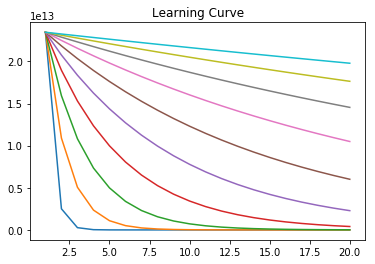

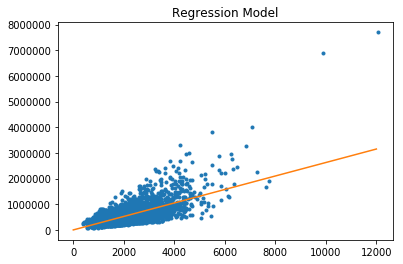

array([  8.22753395e-02,   2.62609078e+02])

In [53]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 1)
degree_1_model = plot_regression(train_output, train_feat, weights, test, 
                                 np.logspace(-11, -13, 10), 20)
degree_1_model

Degree 2

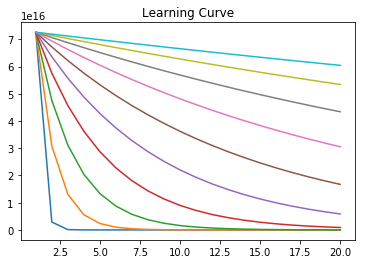

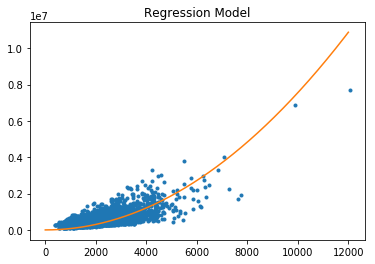

array([  5.84471608e-08,   8.82534317e-05,   7.55939623e-02])

In [54]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 2)
degree_2_model = plot_regression(train_output, train_feat, weights, test, 
                                 np.logspace(-18, -20, 10), 20)
degree_2_model

Degree 3

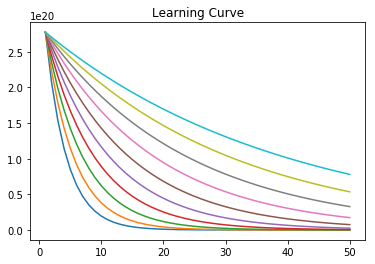

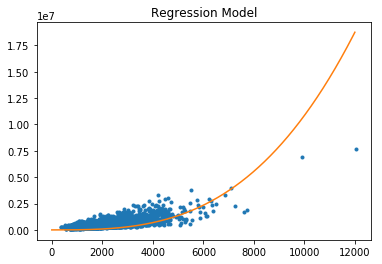

array([  3.33273180e-15,   6.92811583e-12,   1.45612900e-08,
         1.08471690e-05])

In [20]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 3)
plot_regression(train_output, train_feat, weights, test, np.logspace(-26, -27, 10), 50)

Degree 4

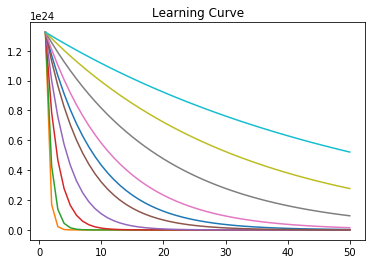

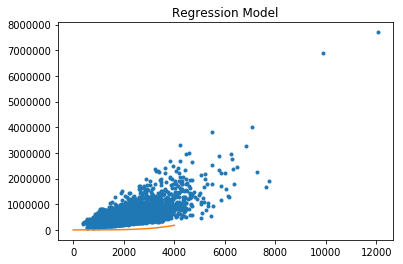

array([  4.32758398e-22,   1.02170933e-18,   2.73947016e-15,
         7.03154241e-12,   7.01448796e-10])

In [55]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 4)
plot_regression(train_output, train_feat, weights, test, np.logspace(-33, -35, 10), 50, end=4000)

Degree 5

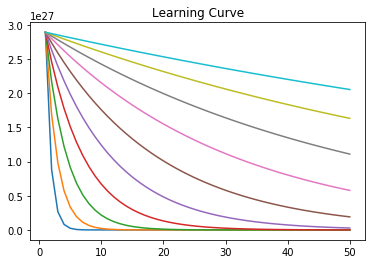

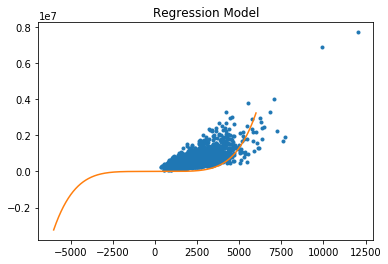

array([  4.10761194e-29,   9.62529962e-26,   2.80409079e-22,
         1.07820760e-18,   5.77714591e-15,   4.16039161e-13])

In [56]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 5)
plot_regression(train_output, train_feat, weights, test, np.logspace(-40, -42, 10), 50, start=-6000, end=6000)

# Initial weights
It looks like our models are not being fit very well with higher order polynomials.  This is probably because our initial weights are not very good.

This dataset looks approximately linear so this may not be a good example but we are going to recalculate the previous model but instead of initialize the weights as zero, we are going to reuse the previous weights and set the new term to zero.

Degree 2

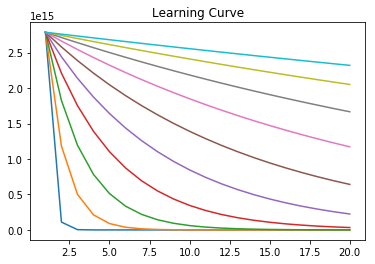

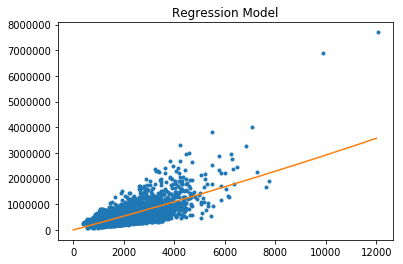

array([  8.22753322e-02,   2.62609063e+02,   2.90279876e-03])

In [61]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 2)
weights = np.append(degree_1_model, 0)
degree_2 = plot_regression(train_output, train_feat, weights, test, np.logspace(-18, -20, 10), 20)
degree_2

Degree 3

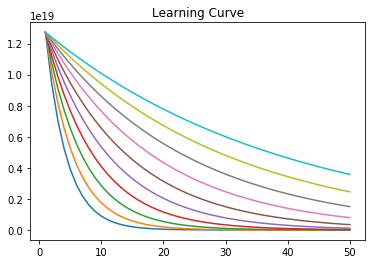

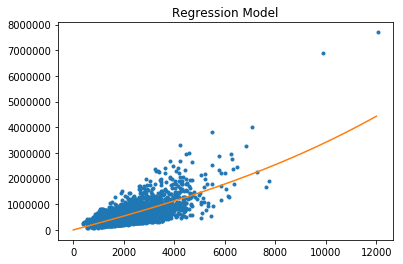

array([  8.22753322e-02,   2.62609063e+02,   2.90279776e-03,
         4.97549727e-07])

In [64]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 3)
weights = np.append(degree_2, 0)
degree_3 = plot_regression(train_output, train_feat, weights, test, 
                           np.logspace(-26, -27, 10), 50)
degree_3

Degree 4

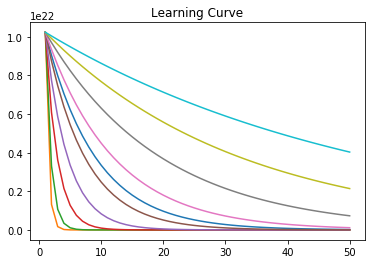

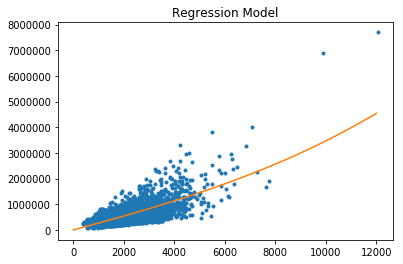

array([  8.22753322e-02,   2.62609063e+02,   2.90279776e-03,
         4.97549674e-07,   5.42558651e-12])

In [65]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 4)
weights = np.append(degree_3, 0)
degree_4 = plot_regression(train_output, train_feat, weights, test, 
                           np.logspace(-33, -35, 10), 50)
degree_4

Degree 5

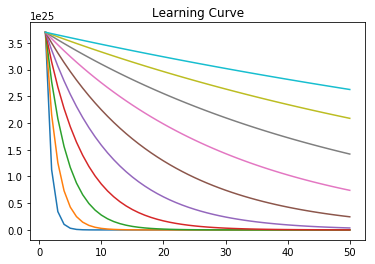

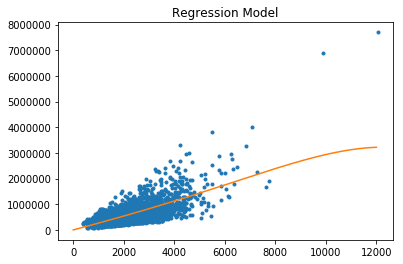

array([  8.22753322e-02,   2.62609063e+02,   2.90279776e-03,
         4.97549674e-07,   5.42559737e-12,  -5.31778216e-15])

In [68]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 5)
weights = np.append(degree_4, 0)
degree_5 = plot_regression(train_output, train_feat, weights, test, 
                           np.logspace(-40, -42, 10), 50)
degree_5